# **Modeling**

# Part 1: Preparing the Data

In [454]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [455]:
os.getcwd()

'/workspace'

In [456]:
data = pd.read_csv('Crime_Clean2.csv')

In [457]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [458]:
len(data)

235368

In [459]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [460]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [461]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [462]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']
data = data[data['Crime Name1'] != 'Not a Crime']

In [463]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [464]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour','City'],1)

In [465]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Longitude', 'Latitude', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'White %',
       'Black %', 'Day', 'Time_of_Day', 'Weekday'],
      dtype='object')

In [466]:
data['Crimes Against Society Count'] = 0
data['Crimes Against Property Count'] = 0
data['Crimes Against Persons Count'] = 0

# Part 2: Grouping the Data by Day

In [467]:
df = data.groupby(['Day']).size().reset_index(name='Count')
df

,Day,Count
0,2016-07-01,200
1,2016-07-02,146
2,2016-07-03,119
3,2016-07-04,99
4,2016-07-05,139
...,...,...
1676,2021-02-01,45
1677,2021-02-02,57
1678,2021-02-03,64
1679,2021-02-04,50


In [468]:
df2 = data.groupby(['Day','Crime Name1']).size().reset_index(name='Count')
df2

,Day,Crime Name1,Count
0,2016-07-01,Crime Against Person,21
1,2016-07-01,Crime Against Property,112
2,2016-07-01,Crime Against Society,67
3,2016-07-02,Crime Against Person,19
4,2016-07-02,Crime Against Property,58
...,...,...,...
5038,2021-02-04,Crime Against Property,40
5039,2021-02-04,Crime Against Society,8
5040,2021-02-05,Crime Against Person,1
5041,2021-02-05,Crime Against Property,5


In [469]:
df2 = data[data['Crime Name1'] == 'Crime Against Person'].groupby(['Day']).size().reset_index(name='Crime Against Person Count')
df2

,Day,Crime Against Person Count
0,2016-07-01,21
1,2016-07-02,19
2,2016-07-03,15
3,2016-07-04,15
4,2016-07-05,18
...,...,...
1676,2021-02-01,5
1677,2021-02-02,7
1678,2021-02-03,8
1679,2021-02-04,2


In [470]:
df2b = data[data['Crime Name1'] == 'Crime Against Property'].groupby(['Day']).size().reset_index(name='Crime Against Property Count')
df2b

,Day,Crime Against Property Count
0,2016-07-01,112
1,2016-07-02,58
2,2016-07-03,58
3,2016-07-04,46
4,2016-07-05,82
...,...,...
1676,2021-02-01,34
1677,2021-02-02,47
1678,2021-02-03,53
1679,2021-02-04,40


In [471]:
df2c = data[data['Crime Name1'] == 'Crime Against Society'].groupby(['Day']).size().reset_index(name='Crime Against Society Count')
df2c

,Day,Crime Against Society Count
0,2016-07-01,67
1,2016-07-02,69
2,2016-07-03,46
3,2016-07-04,38
4,2016-07-05,39
...,...,...
1676,2021-02-01,6
1677,2021-02-02,3
1678,2021-02-03,3
1679,2021-02-04,8


In [472]:
df3 = data.groupby(['Day','Place']).size().reset_index(name='Count')
df3

,Day,Place,Count
0,2016-07-01,Bank - ATM,5
1,2016-07-01,Bank/S&L/Credit Union,2
2,2016-07-01,Commercial - Office Building,4
3,2016-07-01,Convenience Store,1
4,2016-07-01,Gas Station,1
...,...,...,...
51467,2021-02-05,Commercial - Office Building,1
51468,2021-02-05,Convenience Store,2
51469,2021-02-05,Other/Unknown,2
51470,2021-02-05,Residence - Single Family,1


In [473]:
df4 = data.groupby(['Day','Time_of_Day']).size().reset_index(name='Count')
df4

,Day,Time_of_Day,Count
0,2016-07-01,Afternoon,45
1,2016-07-01,Early Morning,7
2,2016-07-01,Late Afternoon/Early Evening,27
3,2016-07-01,Late Night,46
4,2016-07-01,Morning,33
...,...,...,...
10053,2021-02-04,Morning,5
10054,2021-02-04,Night,8
10055,2021-02-05,Afternoon,1
10056,2021-02-05,Late Night,3


In [474]:
df5 = data.groupby(['Day','Weekday']).size().reset_index(name='Count')
df5

,Day,Weekday,Count
0,2016-07-01,1.0,200
1,2016-07-02,0.0,146
2,2016-07-03,0.0,119
3,2016-07-04,1.0,99
4,2016-07-05,1.0,139
...,...,...,...
1676,2021-02-01,1.0,45
1677,2021-02-02,1.0,57
1678,2021-02-03,1.0,64
1679,2021-02-04,1.0,50


In [475]:
df6 = data.groupby(['Day'])
df6b = df6['Income'].mean().reset_index(name='Mean Income')
df6b


,Day,Mean Income
0,2016-07-01,106514.025000
1,2016-07-02,98466.287671
2,2016-07-03,103432.134454
3,2016-07-04,100306.131313
4,2016-07-05,105139.136691
...,...,...
1676,2021-02-01,112109.111111
1677,2021-02-02,131124.070175
1678,2021-02-03,104034.656250
1679,2021-02-04,119877.500000


In [476]:
df6c = df6['Pop'].mean().reset_index(name='Mean Pop')
df6c

,Day,Mean Pop
0,2016-07-01,2144.675000
1,2016-07-02,2088.417808
2,2016-07-03,2457.554622
3,2016-07-04,2180.292929
4,2016-07-05,2034.438849
...,...,...
1676,2021-02-01,2029.088889
1677,2021-02-02,1933.000000
1678,2021-02-03,2027.640625
1679,2021-02-04,1990.660000


In [477]:
df6d = df6['Public Transportation %'].mean().reset_index(name='Mean Public Transportation %')
df6d

,Day,Mean Public Transportation %
0,2016-07-01,0.184065
1,2016-07-02,0.159419
2,2016-07-03,0.165274
3,2016-07-04,0.186869
4,2016-07-05,0.185366
...,...,...
1676,2021-02-01,0.180293
1677,2021-02-02,0.163171
1678,2021-02-03,0.172570
1679,2021-02-04,0.134308


In [478]:
df6e = df6['Victims'].mean().reset_index(name='Mean Victims')
df6e

,Day,Mean Victims
0,2016-07-01,1.030000
1,2016-07-02,1.041096
2,2016-07-03,1.033613
3,2016-07-04,1.070707
4,2016-07-05,1.014388
...,...,...
1676,2021-02-01,1.000000
1677,2021-02-02,1.070175
1678,2021-02-03,1.031250
1679,2021-02-04,1.000000


In [479]:
df_final = pd.merge(df, df6b, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income
0,2016-07-01,200,106514.025000
1,2016-07-02,146,98466.287671
2,2016-07-03,119,103432.134454
3,2016-07-04,99,100306.131313
4,2016-07-05,139,105139.136691


In [480]:
df_final = pd.merge(df_final, df6c, how='left', on=['Day'])
df_final = pd.merge(df_final, df6d, how='left', on=['Day'])
df_final = pd.merge(df_final, df6e, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388


In [481]:
df_final2 = pd.merge(df_final,df2, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18
...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2


In [482]:
df_final2 = pd.merge(df_final2,df2b, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82
...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40


In [483]:
df_final2 = pd.merge(df_final2,df2c, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39
...,...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34,6
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47,3
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53,3
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40,8


In [484]:
def func(data, df_final):
    
    for place in np.unique(data['Place']):
        
        df2 = data[data['Place'] == place].groupby(['Day']).size().reset_index(name=place + " Place Count")
        df_final = pd.merge(df_final,df2, how='left', on=['Day'])
        
    return df_final

In [485]:
df_final3 = func(data,df_final2)
df_final3.shape

(1681, 92)

In [486]:
df_final3.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,Retail - Video Store Place Count,School/College Place Count,Street - Alley Place Count,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,NaN,1.0,1.0,4.0,7.0,17.0,2.0,15.0,1.0,NaN
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,NaN,NaN,1.0,5.0,9.0,30.0,4.0,14.0,NaN,NaN
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,NaN,2.0,1.0,1.0,4.0,24.0,4.0,7.0,1.0,1.0
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,NaN,NaN,NaN,3.0,17.0,1.0,12.0,NaN,NaN
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,NaN,NaN,NaN,3.0,NaN,14.0,3.0,8.0,NaN,NaN


In [487]:
df_final3['Day'] = pd.to_datetime(df_final3['Day'])

In [488]:
len(df_final3)

1681

In [489]:
data = df_final3.copy()

In [490]:
data = data.set_index('Day')
data = data['2016-07-01':'2021-02-05'].resample('W').sum()

In [491]:
data = data.drop(['Mean Income','Mean Pop','Mean Public Transportation %','Mean Victims'],axis = 1)
data.head()

,Count,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,Auto Dealership Place Count,Auto Repair Place Count,Bank - ATM Place Count,Bank/S&L/Credit Union Place Count,Bar/Night Club Place Count,...,Retail - Video Store Place Count,School/College Place Count,Street - Alley Place Count,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count
Day,,,,,,,,,,,,,,,,,,,,,
2016-07-03,465,55,228,182,0.0,0.0,2.0,5.0,2.0,2.0,...,0.0,3.0,3.0,10.0,20.0,71.0,10.0,36.0,2.0,1.0
2016-07-10,821,95,442,284,1.0,5.0,4.0,4.0,6.0,5.0,...,1.0,1.0,2.0,7.0,12.0,126.0,15.0,71.0,1.0,0.0
2016-07-17,861,82,467,312,2.0,2.0,2.0,7.0,2.0,7.0,...,0.0,9.0,1.0,5.0,30.0,110.0,17.0,73.0,1.0,2.0
2016-07-24,836,97,466,273,1.0,6.0,2.0,7.0,4.0,0.0,...,0.0,4.0,0.0,12.0,30.0,122.0,15.0,64.0,0.0,1.0
2016-07-31,824,74,456,294,1.0,0.0,1.0,4.0,4.0,3.0,...,0.0,3.0,11.0,10.0,25.0,121.0,21.0,53.0,1.0,1.0


# Part 3: Creating and Implementing Rolling Window Functions

In [492]:
## Function for obtaining rolling sum of all three crime types for previous 30, 7, and 2 days

def rolling_crime_count_func(data):
        
        data['4 Week Rolling Crimes Against Society Mean'] = data['Crime Against Society Count'].shift(1).rolling(4).mean()
        data['4 Week Rolling Crimes Against Property Mean'] = data['Crime Against Property Count'].shift(1).rolling(4).mean()
        data['4 Week Rolling Crimes Against Persons Mean'] = data['Crime Against Person Count'].shift(1).rolling(4).mean()
        
        data['2 Week Rolling Crimes Against Society Mean'] = data['Crime Against Society Count'].shift(1).rolling(2).mean()
        data['2 Week Rolling Crimes Against Property Mean'] = data['Crime Against Property Count'].shift(1).rolling(2).mean()
        data['2 Week Rolling Crimes Against Persons Mean'] = data['Crime Against Person Count'].shift(1).rolling(2).mean()
        
        data['4 Week Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].shift(1).rolling(4).sum()
        data['4 Week Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].shift(1).rolling(4).sum()
        data['4 Week Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].shift(1).rolling(4).sum()
        
        data['2 Week Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].shift(1).rolling(2).sum()
        data['2 Week Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].shift(1).rolling(2).sum()
        data['2 Week Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].shift(1).rolling(2).sum()
        
        return data

In [493]:
import re

def rolling_place_count_func(data):
    
    pattern = r'.*\s*(Place)\.*'
    
    for column in data.columns:
        
        if re.match(pattern, column):
            
            data['4 Week Rolling Mean ' +  column] = data[column].shift(1).rolling(4).mean()
        
    return data

In [494]:
data = rolling_crime_count_func(data)

In [495]:
data = rolling_place_count_func(data)

In [496]:
len(data)

241

In [497]:
data.head(9)

,Count,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,Auto Dealership Place Count,Auto Repair Place Count,Bank - ATM Place Count,Bank/S&L/Credit Union Place Count,Bar/Night Club Place Count,...,4 Week Rolling Mean Retail - Video Store Place Count,4 Week Rolling Mean School/College Place Count,4 Week Rolling Mean Street - Alley Place Count,4 Week Rolling Mean Street - Bus Stop Place Count,4 Week Rolling Mean Street - Commercial Place Count,4 Week Rolling Mean Street - In vehicle Place Count,4 Week Rolling Mean Street - Other Place Count,4 Week Rolling Mean Street - Residential Place Count,4 Week Rolling Mean Theater Place Count,4 Week Rolling Mean Wooded Area Place Count
Day,,,,,,,,,,,,,,,,,,,,,
2016-07-03,465,55,228,182,0.0,0.0,2.0,5.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-10,821,95,442,284,1.0,5.0,4.0,4.0,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-17,861,82,467,312,2.0,2.0,2.0,7.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-24,836,97,466,273,1.0,6.0,2.0,7.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-31,824,74,456,294,1.0,0.0,1.0,4.0,4.0,3.0,...,0.25,4.25,1.50,8.50,23.00,107.25,14.25,61.00,1.00,1.00
2016-08-07,905,104,516,285,3.0,3.0,2.0,4.0,3.0,5.0,...,0.25,4.25,3.50,8.50,24.25,119.75,17.00,65.25,0.75,1.00
2016-08-14,775,95,453,227,4.0,1.0,0.0,6.0,1.0,4.0,...,0.00,6.00,3.00,9.50,27.75,117.75,16.75,62.25,0.75,1.75
2016-08-21,776,80,483,213,0.0,2.0,4.0,5.0,2.0,4.0,...,0.00,4.50,3.75,10.25,27.00,113.75,16.75,59.25,0.50,1.25
2016-08-28,904,67,506,331,5.0,4.0,1.0,11.0,4.0,7.0,...,0.00,4.00,5.00,8.50,26.75,105.75,17.50,62.00,0.50,1.50


In [498]:
data.columns

Index(['Count', 'Crime Against Person Count', 'Crime Against Property Count',
       'Crime Against Society Count',
       'Air/Bus/Train/Metro Terminal Place Count',
       'Auto Dealership Place Count', 'Auto Repair Place Count',
       'Bank - ATM Place Count', 'Bank/S&L/Credit Union Place Count',
       'Bar/Night Club Place Count',
       ...
       '4 Week Rolling Mean Retail - Video Store Place Count',
       '4 Week Rolling Mean School/College Place Count',
       '4 Week Rolling Mean Street - Alley Place Count',
       '4 Week Rolling Mean Street - Bus Stop Place Count',
       '4 Week Rolling Mean Street - Commercial Place Count',
       '4 Week Rolling Mean Street - In vehicle Place Count',
       '4 Week Rolling Mean Street - Other Place Count',
       '4 Week Rolling Mean Street - Residential Place Count',
       '4 Week Rolling Mean Theater Place Count',
       '4 Week Rolling Mean Wooded Area Place Count'],
      dtype='object', length=182)

In [499]:
data['4 Week Rolling Crimes Against Property Count'].isnull().sum()

4

In [500]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0,inplace=True)

In [501]:
data['4 Week Rolling Crimes Against Property Count'].isnull().sum()

0

In [502]:
## Create crime count target labels for all three crime types

label1 = np.array(data['Crime Against Society Count'])
label2 = np.array(data['Crime Against Property Count'])
label3 = np.array(data['Crime Against Person Count'])

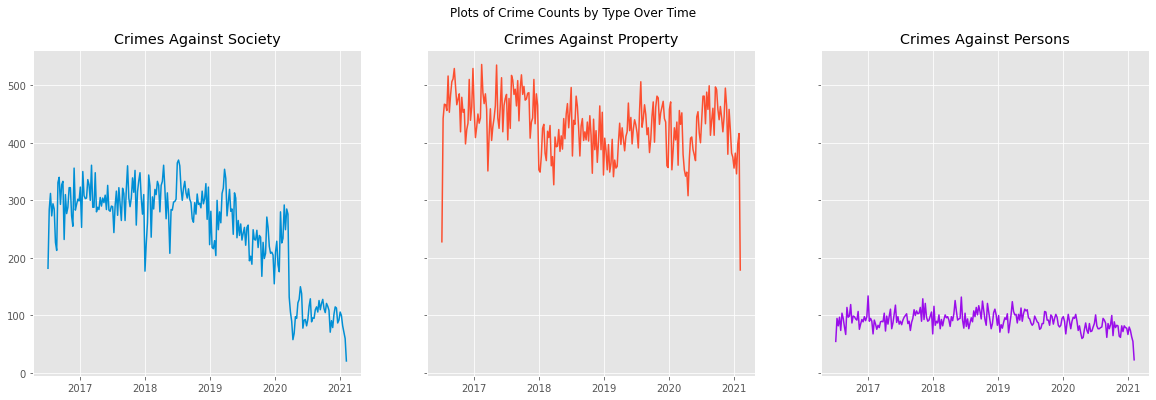

In [503]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6), sharex=True, sharey=True)

fig.suptitle('Plots of Crime Counts by Type Over Time')

ax1.plot(data['Crime Against Society Count'], c = '#008fd5')
ax1.set_title('Crimes Against Society')

ax2.plot(data['Crime Against Property Count'], c = '#fc4f30')
ax2.set_title('Crimes Against Property')

ax3.plot(data['Crime Against Person Count'], c = '#9a0eea')
ax3.set_title('Crimes Against Persons')

plt.show()


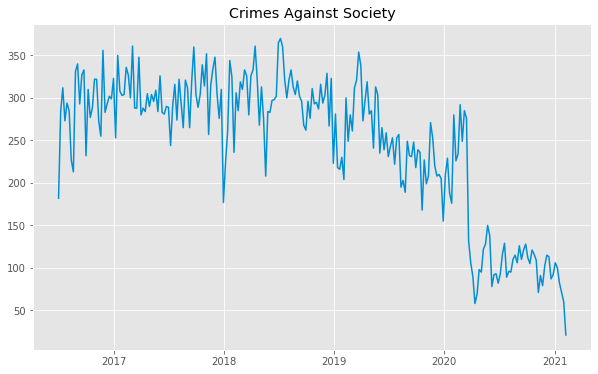

In [504]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

ax1.plot(data['Crime Against Society Count'], c = '#008fd5')
ax1.set_title('Crimes Against Society')
plt.show()

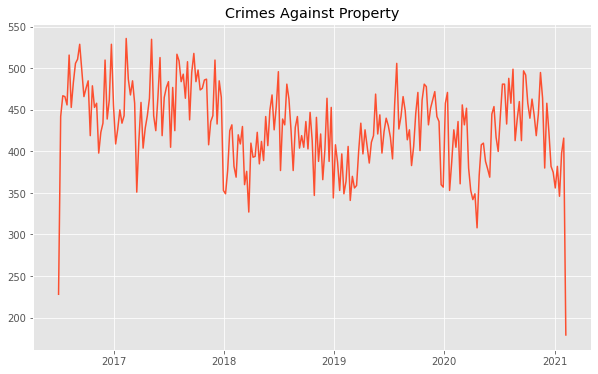

In [505]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

ax1.plot(data['Crime Against Property Count'], c = '#fc4f30')
ax1.set_title('Crimes Against Property')
plt.show()

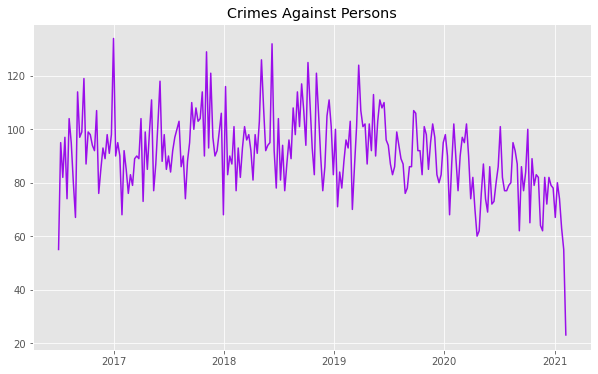

In [506]:
fig, ax1 = plt.subplots(1,1, figsize=(10,6))

ax1.plot(data['Crime Against Person Count'], c = '#9a0eea')
ax1.set_title('Crimes Against Persons')
plt.show()

In [507]:
features = data.copy()

In [508]:
pattern = r'.*\s*(Rolling)\.*'

columns_to_drop = []

for column in data.columns:
    if not re.match(pattern, column):
        columns_to_drop.append(column)

In [509]:
data = data.drop(columns_to_drop,axis=1)

In [355]:
data.head()

,4 Week Rolling Crimes Against Society Mean,4 Week Rolling Crimes Against Property Mean,4 Week Rolling Crimes Against Persons Mean,2 Week Rolling Crimes Against Society Mean,2 Week Rolling Crimes Against Property Mean,2 Week Rolling Crimes Against Persons Mean,4 Week Rolling Crimes Against Society Count,4 Week Rolling Crimes Against Property Count,4 Week Rolling Crimes Against Persons Count,2 Week Rolling Crimes Against Society Count,...,4 Week Rolling Mean Retail - Video Store Place Count,4 Week Rolling Mean School/College Place Count,4 Week Rolling Mean Street - Alley Place Count,4 Week Rolling Mean Street - Bus Stop Place Count,4 Week Rolling Mean Street - Commercial Place Count,4 Week Rolling Mean Street - In vehicle Place Count,4 Week Rolling Mean Street - Other Place Count,4 Week Rolling Mean Street - Residential Place Count,4 Week Rolling Mean Theater Place Count,4 Week Rolling Mean Wooded Area Place Count
Day,,,,,,,,,,,,,,,,,,,,,
2016-07-03,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
2016-07-10,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
2016-07-17,0.00,0.00,0.00,233.0,335.0,75.0,0.0,0.0,0.0,466.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
2016-07-24,0.00,0.00,0.00,298.0,454.5,88.5,0.0,0.0,0.0,596.0,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
2016-07-31,262.75,400.75,82.25,292.5,466.5,89.5,1051.0,1603.0,329.0,585.0,...,0.25,4.25,1.5,8.5,23.0,107.25,14.25,61.0,1.0,1.0


# Part 4: XGB Model Performances

In [356]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [357]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.04):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

In [358]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data,label1, test_size=0.25, shuffle=False)

In [359]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=4)

xgb.fit(train, train_labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=28, num_parallel_tree=1, random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [360]:
best_model = xgb

In [361]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
predictions = best_model.predict(test)
mean_absolute_error(test_labels, predictions)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


120.16308093461834

In [362]:
errors = abs(predictions - test_labels)
np.mean(errors)

120.16308093461834

In [363]:
mean_squared_error(test_labels, predictions)

17094.006919511754

In [364]:
mean_absolute_percentage_error(test_labels, predictions)

1.3224139355456734

In [365]:
mape = np.mean(100*(errors/test_labels))
accuracy = 100 - mape
accuracy

-32.24139355456734

In [366]:
importances1 = list(best_model.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [367]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

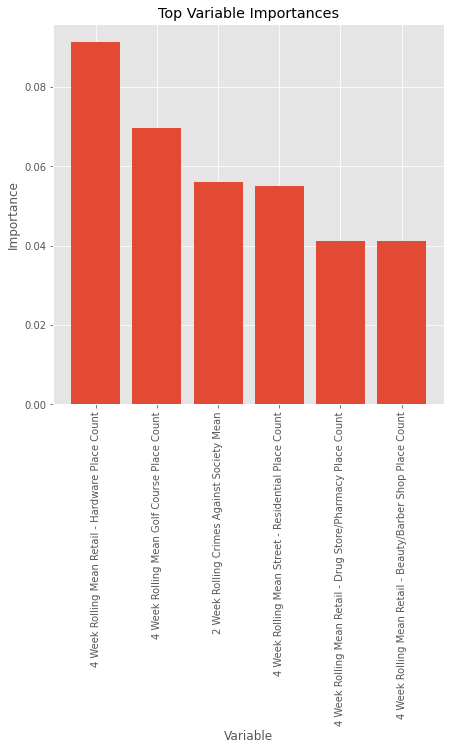

In [368]:
plotImportances(top_importances1, top_features_list1)

In [369]:
len(test_labels)

61

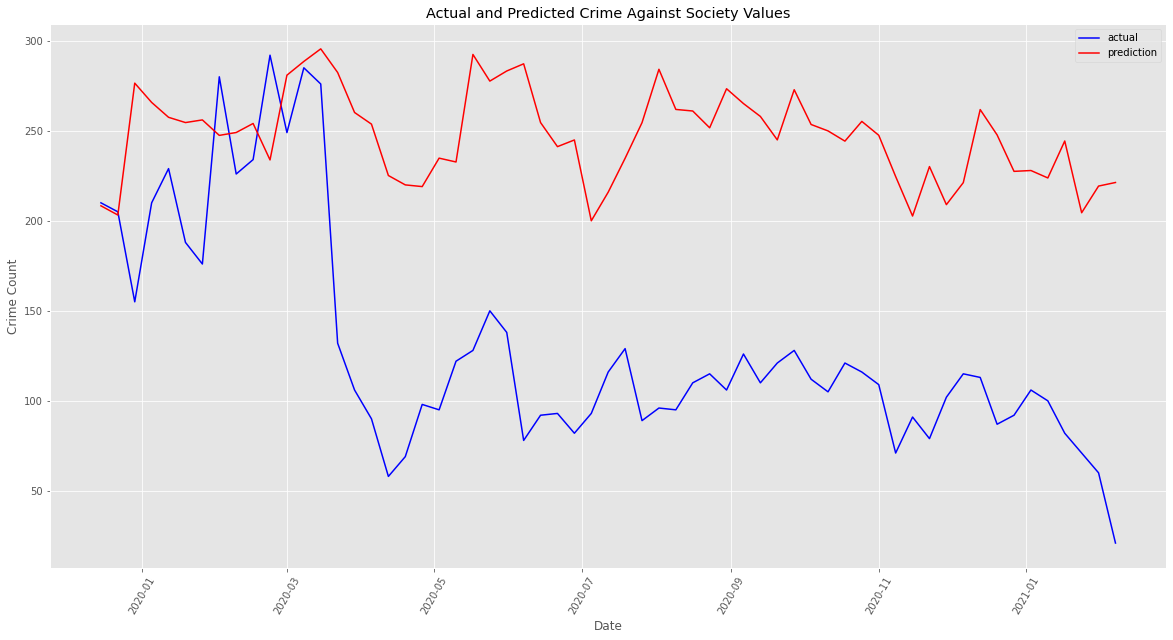

In [370]:
plt.plot(test.index, test_labels, 'b-', label = 'actual')# Plot the predicted values
plt.plot(test.index, predictions, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Society Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [371]:
train2, test2, train_labels2, test_labels2 = train_test_split(data,label2, test_size=0.25,shuffle=False)

In [372]:
xgb.fit(train2, train_labels2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=28, num_parallel_tree=1, random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [373]:
best_model2 = xgb
predictions2 = best_model2.predict(test2)
mean_absolute_error(test_labels2, predictions2)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


47.592300665183146

In [374]:
errors2 = abs(predictions2 - test_labels2)
np.mean(errors2)

47.592300665183146

In [375]:
mean_squared_error(test_labels2, predictions2)

3315.2312544018

In [376]:
mean_absolute_percentage_error(test_labels2, predictions2)

0.12386831655732244

In [377]:
mape2 = np.mean(100*(errors2/test_labels2))
accuracy2 = 100 - mape2
accuracy2

87.61316834426775

In [378]:
importances1 = list(best_model2.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [379]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

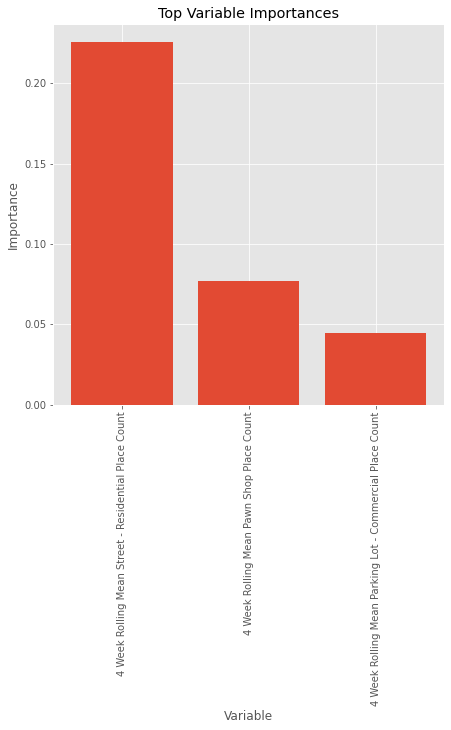

In [380]:
plotImportances(top_importances1, top_features_list1)

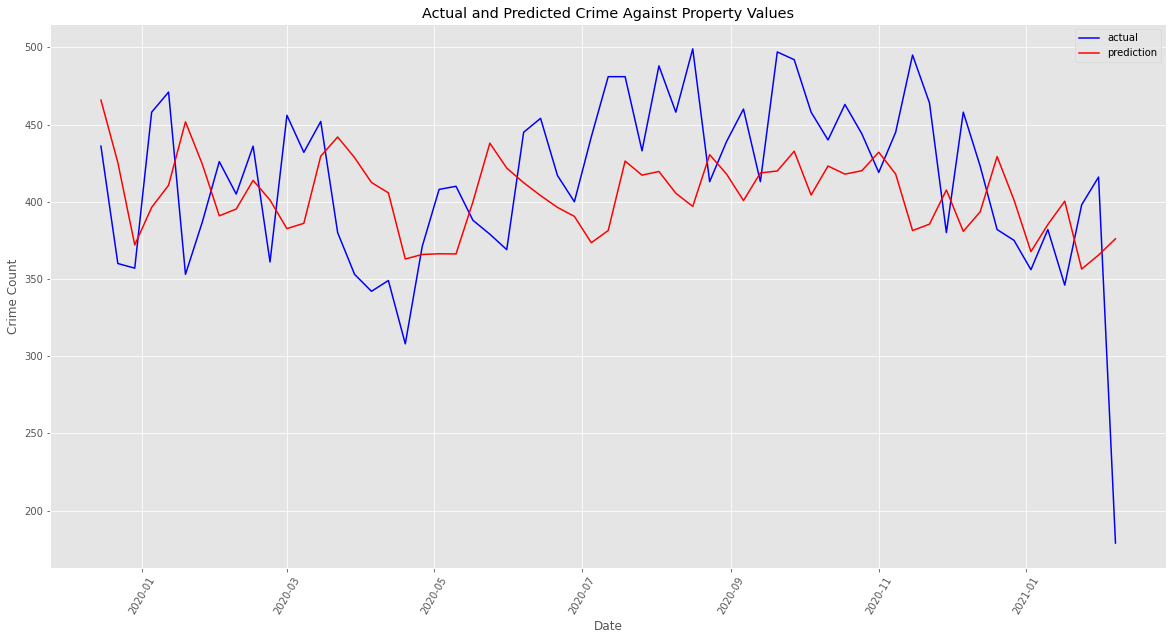

In [381]:
plt.plot(test.index,test_labels2, 'b-', label = 'actual')# Plot the predicted values
plt.plot(test.index, predictions2, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Property Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [382]:
train3, test3, train_labels3, test_labels3 = train_test_split(data,label3, test_size=0.25, shuffle=False)

In [383]:
xgb.fit(train3, train_labels3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=28, num_parallel_tree=1, random_state=4,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [384]:
best_model3 = xgb
predictions3 = best_model3.predict(test3)
mean_absolute_error(test_labels3, predictions3)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


9.325827176453638

In [385]:
errors3 = abs(predictions3 - test_labels3)
np.mean(errors3)

9.325827176453638

In [386]:
mean_squared_error(test_labels3, predictions3)

168.65429221945777

In [387]:
mean_absolute_percentage_error(test_labels3, predictions3)

0.15128698085886175

In [388]:
mape3 = np.mean(100*(errors3/test_labels3))
accuracy3 = 100 - mape3
accuracy3

84.87130191411383

In [389]:
importances3 = list(best_model3.feature_importances_)
feature_list3 = list(data.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [390]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

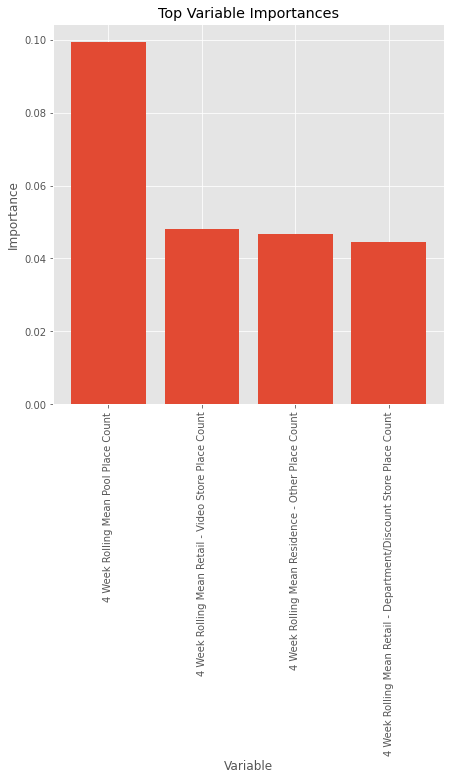

In [391]:
plotImportances(top_importances3, top_features_list3)

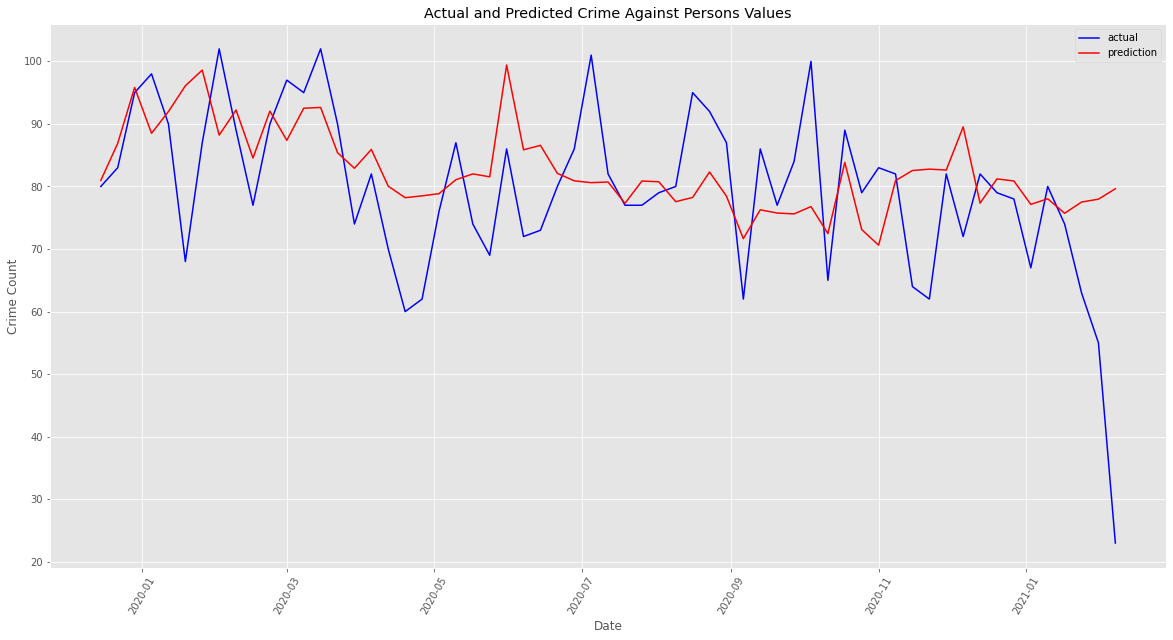

In [392]:
plt.plot(test.index, test_labels3, 'b-', label = 'actual')# Plot the predicted values
plt.plot(test.index, predictions3, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Persons Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

# Can Exponential Smoothing/ARIMA Do Better?

In [393]:
len(data)

241

In [395]:
train_data = features[:180]
test_data = features[180:]

In [396]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

alpha = 0.8
simple_model = SimpleExpSmoothing(train_data['Crime Against Property Count']).fit(smoothing_level=alpha)
double_model = ExponentialSmoothing(train_data['Crime Against Property Count'],trend='add').fit()
triple_model = ExponentialSmoothing(train_data['Crime Against Property Count'],trend='add',seasonal='add').fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [397]:
preds_simple = simple_model.forecast(61)
preds_double = double_model.forecast(61)
preds_triple = triple_model.forecast(61)

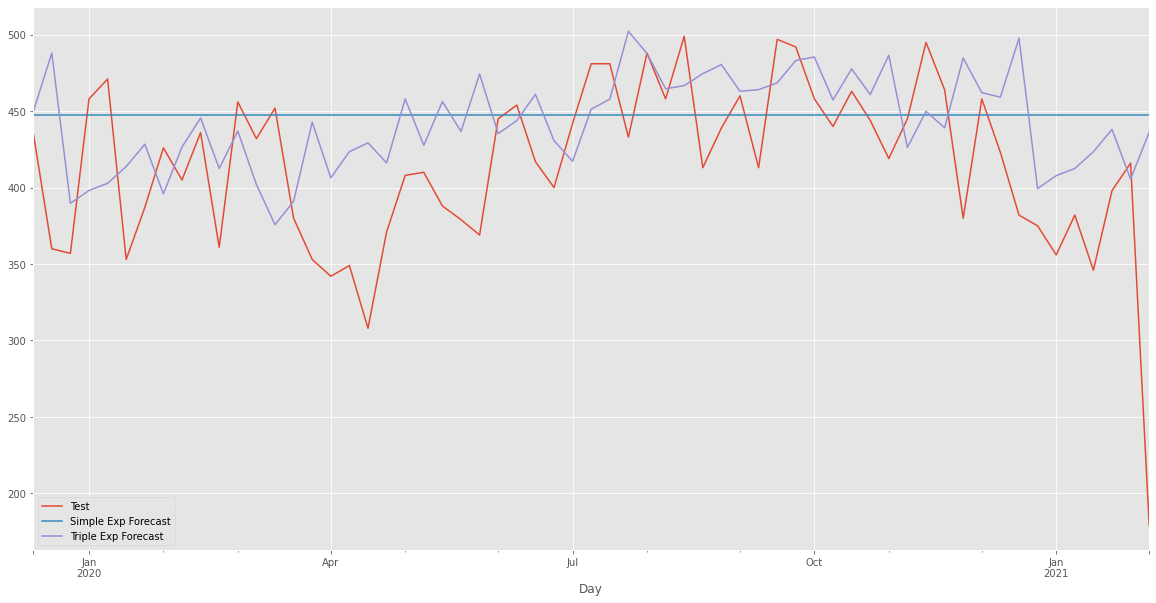

In [398]:
test_data['Crime Against Property Count'].plot(legend=True,label='Test')
preds_simple.plot(legend=True, label = 'Simple Exp Forecast')
preds_triple.plot(legend=True, label = 'Triple Exp Forecast')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [399]:
mean_absolute_error(test_data['Crime Against Property Count'], preds_triple)

46.02414737855939

In [400]:
mean_squared_error(test_data['Crime Against Property Count'], preds_triple)

3800.9288741111604

In [401]:
mean_absolute_percentage_error(test_data['Crime Against Property Count'], preds_triple)

0.1299718760920407

In [402]:
alpha = 0.8
simple_model2 = SimpleExpSmoothing(train_data['Crime Against Society Count']).fit(smoothing_level=alpha)
double_model2 = ExponentialSmoothing(train_data['Crime Against Society Count'],trend='add').fit()
triple_model2 = ExponentialSmoothing(train_data['Crime Against Society Count'],trend='add',seasonal='add').fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [404]:
preds_simple = simple_model2.forecast(61)
preds_double = double_model2.forecast(61)
preds_triple = triple_model2.forecast(61)

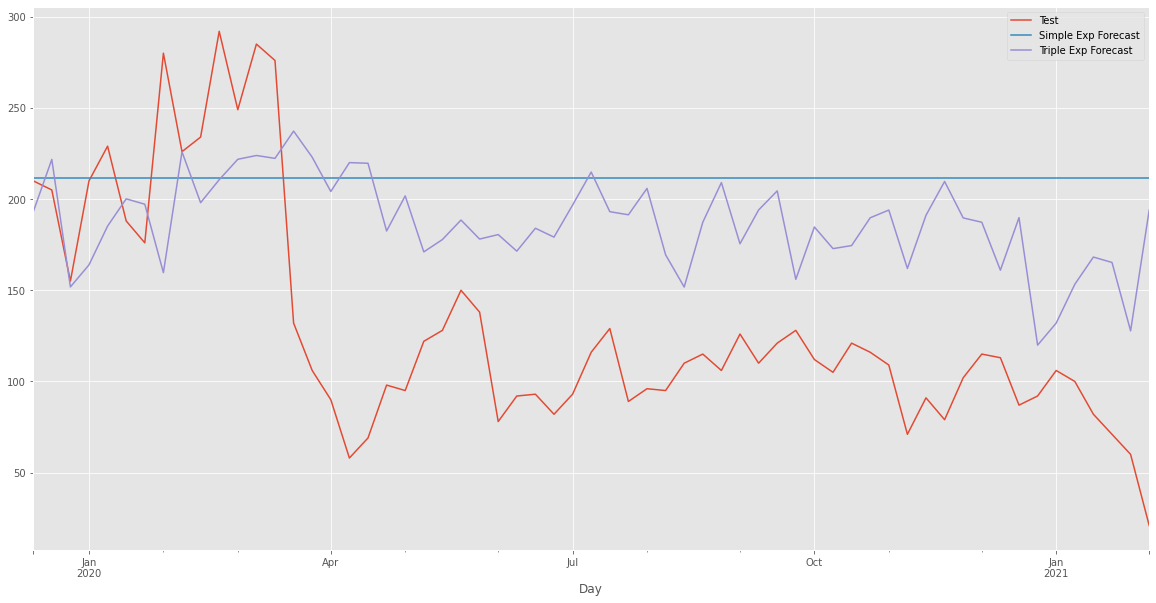

In [405]:
test_data['Crime Against Society Count'].plot(legend=True,label='Test')
preds_simple.plot(legend=True, label = 'Simple Exp Forecast')
preds_triple.plot(legend=True, label = 'Triple Exp Forecast')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [406]:
mean_absolute_error(test_data['Crime Against Society Count'], preds_triple)

73.06006515846667

In [407]:
mean_squared_error(test_data['Crime Against Society Count'], preds_triple)

6753.864434539622

In [408]:
mean_absolute_percentage_error(test_data['Crime Against Society Count'], preds_triple)

0.8305826092425818

In [409]:
alpha = 0.8
simple_model3 = SimpleExpSmoothing(train_data['Crime Against Person Count']).fit(smoothing_level=alpha)
double_model3 = ExponentialSmoothing(train_data['Crime Against Person Count'],trend='add').fit()
triple_model3 = ExponentialSmoothing(train_data['Crime Against Person Count'],trend='add',seasonal='add').fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [410]:
preds_simple = simple_model3.forecast(61)
preds_double = double_model3.forecast(61)
preds_triple = triple_model3.forecast(61)

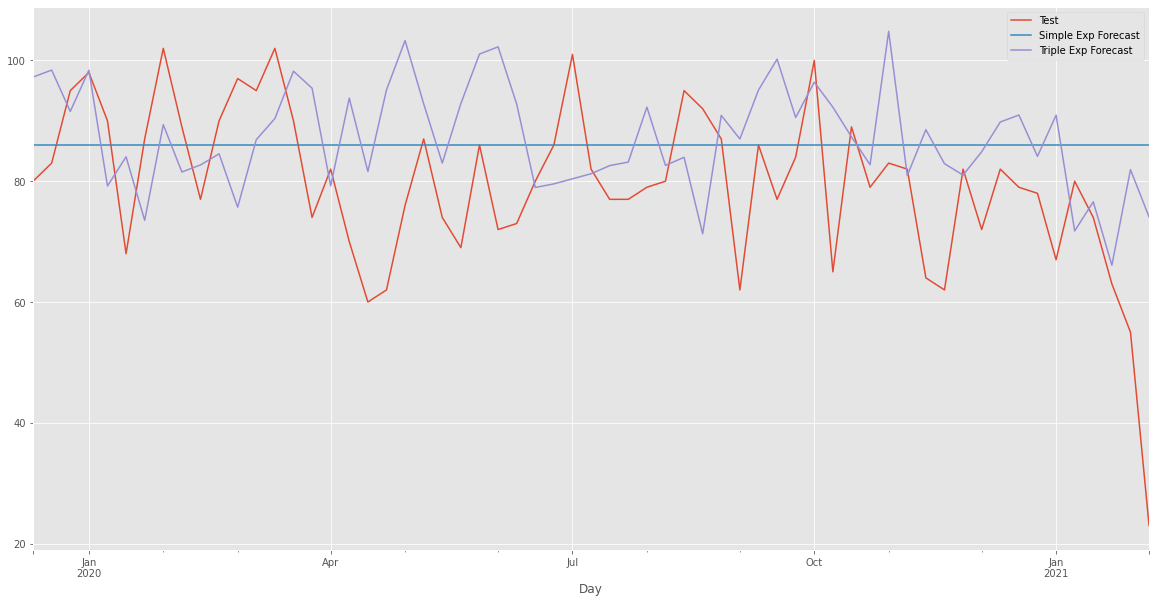

In [411]:
test_data['Crime Against Person Count'].plot(legend=True,label='Test')
preds_simple.plot(legend=True, label = 'Simple Exp Forecast')
preds_triple.plot(legend=True, label = 'Triple Exp Forecast')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [412]:
mean_absolute_error(test_data['Crime Against Person Count'], preds_triple)

13.231466911907129

In [413]:
mean_squared_error(test_data['Crime Against Person Count'], preds_triple)

277.36698375042147

In [414]:
mean_absolute_percentage_error(test_data['Crime Against Person Count'], preds_triple)

0.20225373194851165

In [415]:
from statsmodels.tsa.arima.model import ARIMA

In [416]:
test.index

DatetimeIndex(['2019-12-15', '2019-12-22', '2019-12-29', '2020-01-05',
               '2020-01-12', '2020-01-19', '2020-01-26', '2020-02-02',
               '2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01',
               '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29',
               '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26',
               '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21',
               '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19',
               '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16',
               '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13',
               '2020-09-20', '2020-09-27', '2020-10-04', '2020-10-11',
               '2020-10-18', '2020-10-25', '2020-11-01', '2020-11-08',
               '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06',
               '2020-12-13', '2020-12-20', '2020-12-27', '2021-01-03',
      

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


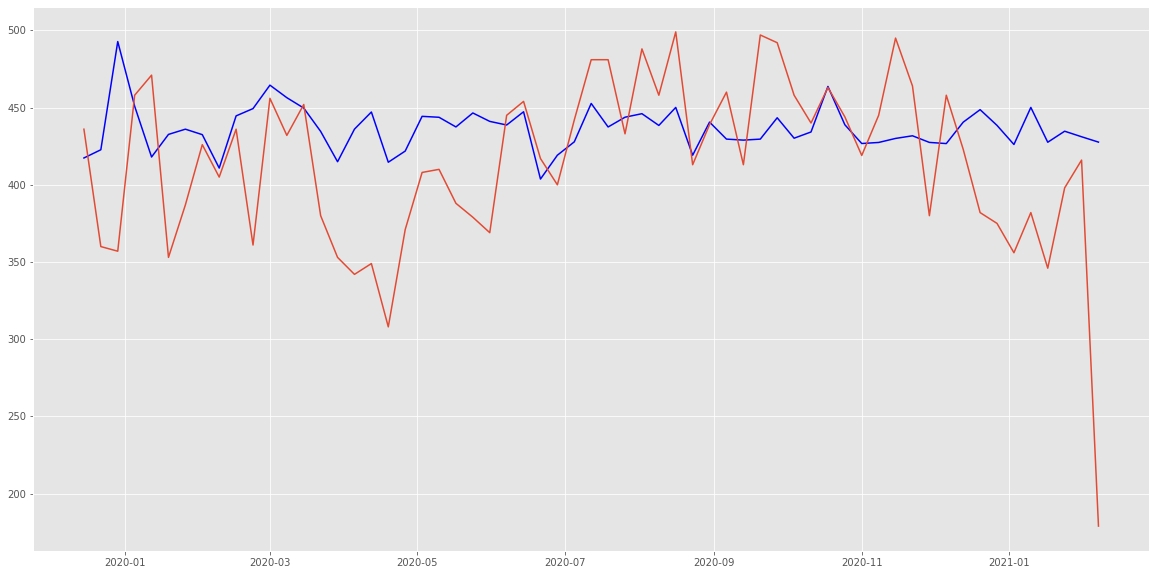

In [444]:
model = ARIMA(train_data['Crime Against Property Count'], order=(25,1,25))
results_AR = model.fit()
start_index = '2019-12-15'
end_index = '2021-02-07'
forecast = results_AR.predict(start_index, end_index)
plt.plot(forecast, color='blue')
plt.plot(test_data['Crime Against Property Count'])
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [445]:
mean_absolute_error(test_data['Crime Against Property Count'], forecast)

42.737213048875134

In [446]:
mean_absolute_percentage_error(test_data['Crime Against Property Count'], forecast)

0.12187555301213897

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


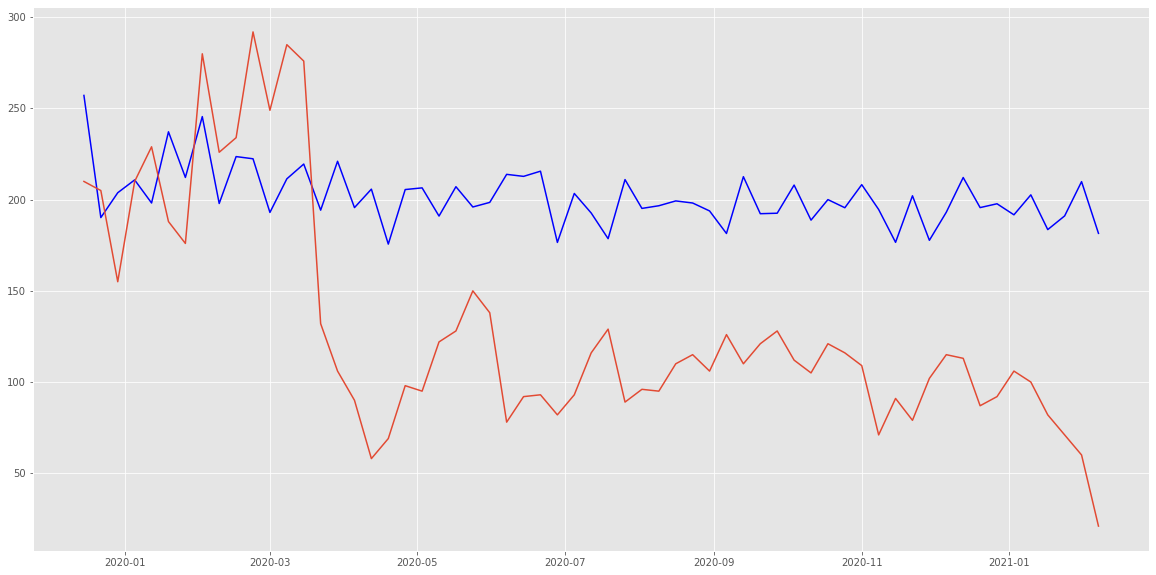

In [447]:
model2 = ARIMA(train_data['Crime Against Society Count'], order=(25,1,25))
results_AR2 = model2.fit()
start_index = '2019-12-15'
end_index = '2021-02-07'
forecast = results_AR2.predict(start_index, end_index)
plt.plot(forecast, color='blue')
plt.plot(test_data['Crime Against Society Count'])
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [448]:
mean_absolute_error(test_data['Crime Against Society Count'], forecast)

83.81972813169186

In [449]:
mean_absolute_percentage_error(test_data['Crime Against Society Count'], forecast)

0.9389352737991941

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


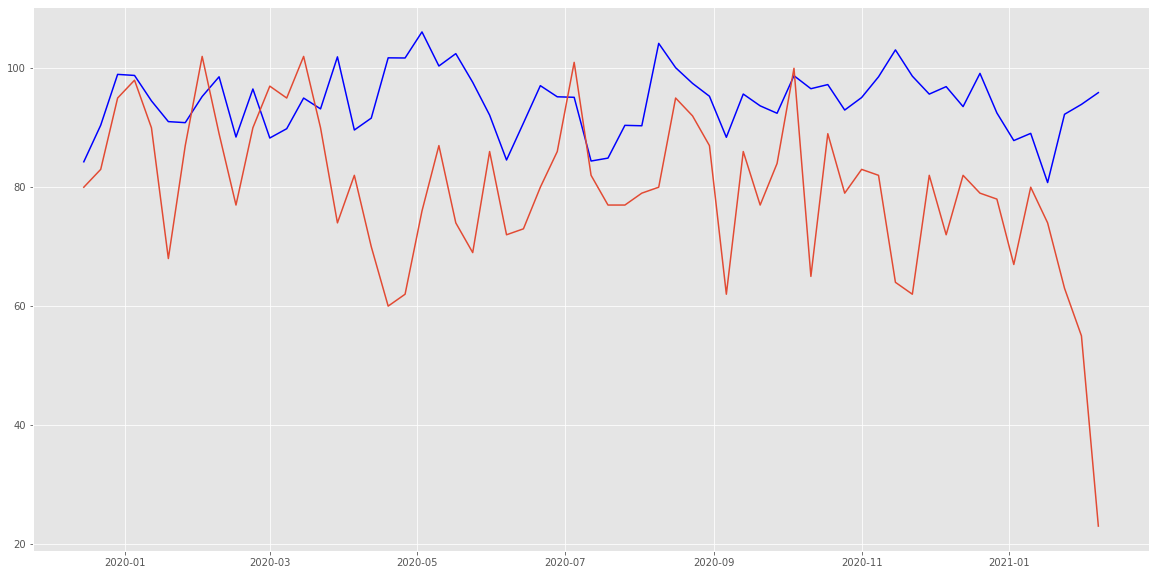

In [450]:
model2 = ARIMA(train_data['Crime Against Person Count'], order=(25,1,25))
results_AR2 = model2.fit()
start_index = '2019-12-15'
end_index = '2021-02-07'
forecast = results_AR2.predict(start_index, end_index)
plt.plot(forecast, color='blue')
plt.plot(test_data['Crime Against Person Count'])
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [451]:
mean_absolute_error(test_data['Crime Against Person Count'], forecast)

15.992324134600562

In [452]:
mean_absolute_percentage_error(test_data['Crime Against Society Count'], forecast)

0.3259485073944783